# Team 5 - Global Terrorism

![](https://www.start.umd.edu/gtd/images/START_GlobalTerrorismDatabase_TerroristAttacksConcentrationIntensityMap_45Years.png)

_For more information about the dataset, read [here](https://www.kaggle.com/START-UMD/gtd)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Use `encoding ='ISO-8859-1'` when reading the .csv file
- There are many columns that are not really helpful for us. Can you identify and drop them?
- Can you draw a map of terrorism event locations?
- And more...

Import tools set

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

     |████████████████████████████████| 993kB 2.8MB/s 


Verify google account

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Import data from google drive

In [0]:
link = 'https://drive.google.com/open?id=14DQK3oSRqMjCpOflR9_MipUl3rmSAV0b'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('terrorism.csv')  
df = pd.read_csv('terrorism.csv', encoding='ISO-8859-1')

Check size of null columns

In [17]:
df.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
corp1               42550
target1               636
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
nperps              71115
nperpcap            69489
claimed     

Drop unnecessary columns

In [0]:
df.drop(columns=df.columns[df.isnull().sum()>100000],axis=1, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
eventid             181691 non-null int64
iyear               181691 non-null int64
imonth              181691 non-null int64
iday                181691 non-null int64
extended            181691 non-null int64
country             181691 non-null int64
country_txt         181691 non-null object
region              181691 non-null int64
region_txt          181691 non-null object
provstate           181270 non-null object
city                181257 non-null object
latitude            177135 non-null float64
longitude           177134 non-null float64
specificity         181685 non-null float64
vicinity            181691 non-null int64
summary             115562 non-null object
crit1               181691 non-null int64
crit2               181691 non-null int64
crit3               181691 non-null int64
doubtterr           181690 non-null float64
multiple            181690 non-null 

Total incedents group by year

In [47]:
df.groupby(['iyear']).size()

iyear
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
dtype: int64

Total incidents group by country_txt, city, size

In [43]:
df.groupby(['country_txt','city']).size().to_frame('size').reset_index().sort_values(['size'], ascending=[False]).nlargest(10, columns='size')

,country_txt,city,size
16078,Iraq,Baghdad,7585
23872,Pakistan,Karachi,2651
25889,Peru,Lima,2359
16649,Iraq,Mosul,2265
35630,United Kingdom,Belfast,2170
5650,Chile,Santiago,1611
30307,Somalia,Mogadishu,1581
8848,El Salvador,San Salvador,1558
2608,Afghanistan,Unknown,1124
34555,Turkey,Istanbul,1048


Chart about incidents by year

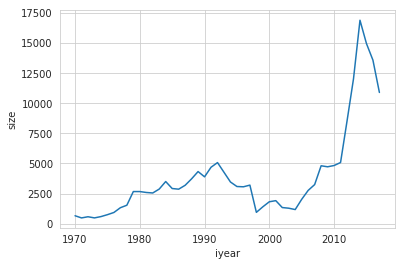

In [50]:
sns.lineplot(x="iyear", y="size", data=df.groupby(['iyear']).size().to_frame('size').reset_index())